# Churn Prediction

## Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('Churn.csv')

In [3]:
pd.set_option('display.max_columns', None)

## Understanding the data

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum().to_frame()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,5973-EJGDP,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## Data manipulation

### Label encoding for all categorical variables

In [11]:
#gender
df.gender.value_counts().to_frame()

,gender
Male,3555
Female,3488


In [12]:
gender_map = {
    'Male' : 1,
    'Female' : 0
}
df.gender = df.gender.map(gender_map)

In [13]:
#Partner
df.Partner.value_counts().to_frame()

,Partner
No,3641
Yes,3402


In [14]:
binary_map = {
    'Yes' : 1,
    'No' : 0
}
df.Partner = df.Partner.map(binary_map)

In [15]:
#Dependents
df.Dependents.value_counts().to_frame()

,Dependents
No,4933
Yes,2110


In [16]:
df.Dependents = df.Dependents.map(binary_map)


In [17]:
#PhoneService
df.PhoneService.value_counts().to_frame()

,PhoneService
Yes,6361
No,682


In [18]:
df.PhoneService = df.PhoneService.map(binary_map)

In [19]:
#PaperlessBilling
df.PaperlessBilling.value_counts().to_frame()

,PaperlessBilling
Yes,4171
No,2872


In [20]:
df.PaperlessBilling = df.PaperlessBilling.map(binary_map)

In [21]:
#Churn
df.Churn.value_counts().to_frame()

,Churn
No,5174
Yes,1869


In [22]:
df.Churn = df.Churn.map(binary_map)

In [23]:
#MultipleLines
df.MultipleLines.value_counts().to_frame()

,MultipleLines
No,3390
Yes,2971
No phone service,682


In [24]:
ml_map = {
    'No': 0,
    'Yes': 1,
    'No phone service': 2
}
df.MultipleLines = df.MultipleLines.map(ml_map)

In [25]:
#InternetService
df.InternetService.value_counts().to_frame()

,InternetService
Fiber optic,3096
DSL,2421
No,1526


In [26]:
is_map = {
    'No': 0,
    'DSL': 1,
    'Fiber optic': 2
}
df.InternetService = df.InternetService.map(is_map)

In [27]:
#OnlineSecurity
df.OnlineSecurity.value_counts().to_frame()

,OnlineSecurity
No,3498
Yes,2019
No internet service,1526


In [28]:
os_map = {
    'No': 0,
    'Yes': 1,
    'No internet service': 2
}
df.OnlineSecurity = df.OnlineSecurity.map(os_map)

In [29]:
#OnlineBackup
df.OnlineBackup.value_counts().to_frame()

,OnlineBackup
No,3088
Yes,2429
No internet service,1526


In [30]:
df.OnlineBackup = df.OnlineBackup.map(os_map)

In [31]:
#DeviceProtection
df.DeviceProtection.value_counts().to_frame()

,DeviceProtection
No,3095
Yes,2422
No internet service,1526


In [32]:
df.DeviceProtection = df.DeviceProtection.map(os_map)

In [33]:
#TechSupport
df.TechSupport.value_counts().to_frame()

,TechSupport
No,3473
Yes,2044
No internet service,1526


In [34]:
df.TechSupport = df.TechSupport.map(os_map)

In [35]:
#StreamingTV
df.StreamingTV.value_counts().to_frame()

,StreamingTV
No,2810
Yes,2707
No internet service,1526


In [36]:
df.StreamingTV = df.StreamingTV.map(os_map)

In [37]:
#StreamingMovies
df.StreamingMovies.value_counts().to_frame()

,StreamingMovies
No,2785
Yes,2732
No internet service,1526


In [38]:
df.StreamingMovies = df.StreamingMovies.map(os_map)

In [39]:
#Contract
df.Contract.value_counts().to_frame()

,Contract
Month-to-month,3875
Two year,1695
One year,1473


In [40]:
contract_map = {
    'Month-to-month': 0,
    'Two year': 1,
    'One year': 2
}
df.Contract = df.Contract.map(contract_map)

In [41]:
#PaymentMethod
df.PaymentMethod.value_counts().to_frame()

,PaymentMethod
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [42]:
pm_map = {
    'Electronic check': 0,
    'Mailed check': 1,
    'Bank transfer (automatic)': 2,
    'Credit card (automatic)': 3
}
df.PaymentMethod = df.PaymentMethod.map(pm_map)

In [43]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [45]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,2,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,0,1,1,0,0,2,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [46]:
encode_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=encode_cols, drop_first=True)

## Data visualization

### Churn

In [47]:
df.Churn.value_counts(normalize=True).to_frame()

,Churn
0,0.73463
1,0.26537


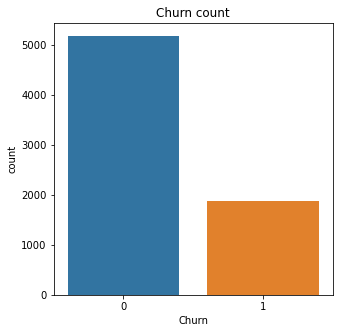

In [48]:
plt.figure(figsize=(5,5))
plt.title('Churn count')
sns.countplot(df.Churn)

### Gender

In [49]:
df.gender.value_counts(normalize=True).to_frame()

,gender
1,0.504756
0,0.495244


In [50]:
df.groupby(df.gender).Churn.mean().to_frame()

,Churn
gender,
0,0.269209
1,0.261603


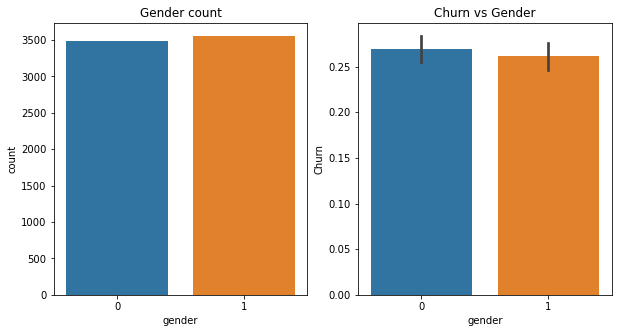

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Gender count')
ax2.set_title('Churn vs Gender')
sns.countplot(df.gender, ax=ax1)
sns.barplot(df.gender, df.Churn, ax=ax2)

### SeniorCitizen

In [52]:
df.SeniorCitizen.value_counts(normalize=True).to_frame()

,SeniorCitizen
0,0.837853
1,0.162147


In [53]:
df.groupby(df.SeniorCitizen).Churn.mean().to_frame()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


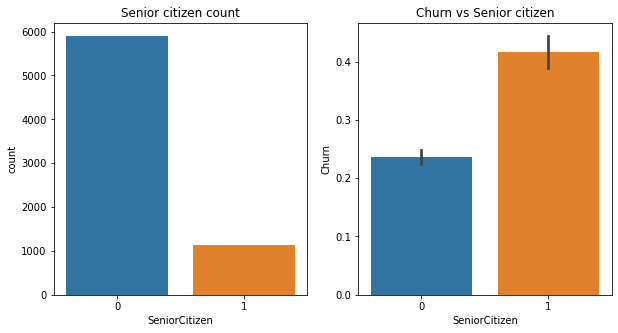

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title('Senior citizen count')
ax2.set_title('Churn vs Senior citizen')
sns.countplot(df.SeniorCitizen, ax=ax1)
sns.barplot(df.SeniorCitizen, df.Churn, ax=ax2)

### Partner

In [55]:
df.Partner.value_counts(normalize=True).to_frame()

,Partner
0,0.516967
1,0.483033


In [56]:
df.groupby(df.Partner).Churn.mean().to_frame()

,Churn
Partner,
0,0.329580
1,0.196649


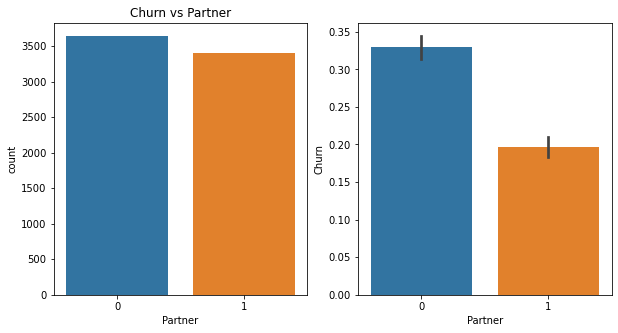

In [57]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('Partner count')
ax1.set_title('Churn vs Partner')
sns.countplot(df.Partner, ax=ax1)
sns.barplot(df.Partner, df.Churn, ax=ax2)

### Dependents

In [58]:
df.Dependents.value_counts(normalize=True).to_frame()

,Dependents
0,0.700412
1,0.299588


In [59]:
df.groupby(df.Dependents).Churn.mean().to_frame()

,Churn
Dependents,
0,0.312791
1,0.154502


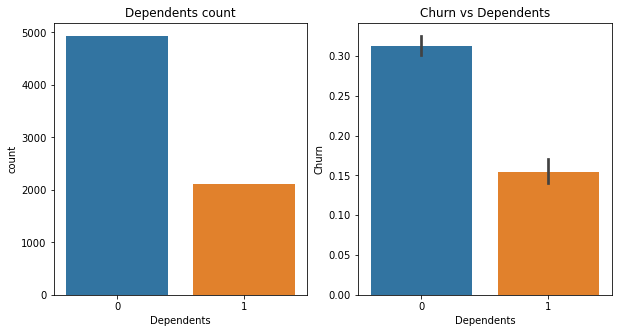

In [60]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('Dependents count')
ax2.set_title('Churn vs Dependents')
sns.countplot(df.Dependents, ax=ax1)
sns.barplot(df.Dependents, df.Churn, ax=ax2)

### Tenure

In [61]:
df.tenure.nunique()

73

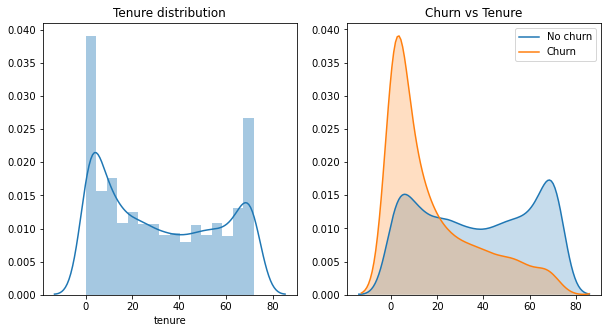

In [62]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('Tenure distribution')
ax2.set_title('Churn vs Tenure')
sns.distplot(df.tenure, ax=ax1)
plot = sns.kdeplot(df.tenure.loc[df.Churn == 0], shade=True, label='No churn', ax=ax2)
plot = sns.kdeplot(df.tenure.loc[df.Churn == 1], shade=True, label='Churn', ax=ax2)

### MonthlyCharges

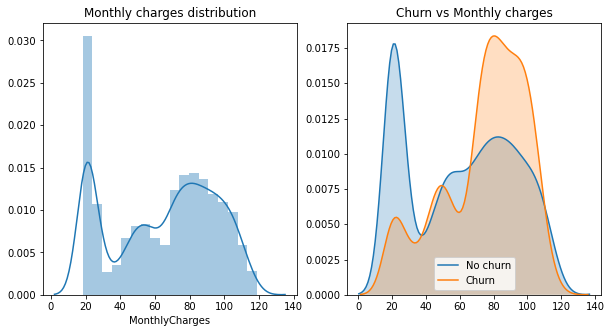

In [63]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('Monthly charges distribution')
ax2.set_title('Churn vs Monthly charges')
sns.distplot(df.MonthlyCharges, ax=ax1)
plot = sns.kdeplot(df.MonthlyCharges.loc[df.Churn == 0], shade=True, label='No churn', ax=ax2)
plot = sns.kdeplot(df.MonthlyCharges.loc[df.Churn == 1], shade=True, label='Churn', ax=ax2)

### TotalCharges

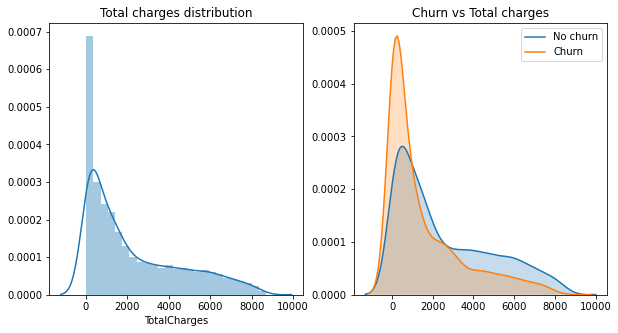

In [64]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('Total charges distribution')
ax2.set_title('Churn vs Total charges')
sns.distplot(df.TotalCharges, ax=ax1)
plot = sns.kdeplot(df.TotalCharges.loc[df.Churn == 0], shade=True, label='No churn', ax=ax2)
plot = sns.kdeplot(df.TotalCharges.loc[df.Churn == 1], shade=True, label='Churn', ax=ax2)

### PhoneService

In [65]:
df.PhoneService.value_counts(normalize=True).to_frame()

,PhoneService
1,0.903166
0,0.096834


In [66]:
df.groupby(df.PhoneService).Churn.mean().to_frame()

,Churn
PhoneService,
0,0.249267
1,0.267096


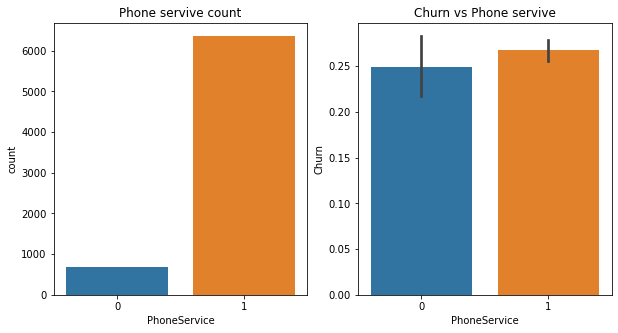

In [67]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('Phone servive count')
ax2.set_title('Churn vs Phone servive')
sns.countplot(df.PhoneService, ax=ax1)
sns.barplot(df.PhoneService, df.Churn, ax=ax2)

### MultipleLines

In [68]:
df.MultipleLines.value_counts(normalize=True).to_frame()

,MultipleLines
0,0.481329
1,0.421837
2,0.096834


In [69]:
df.groupby(df.MultipleLines).Churn.mean().to_frame()

,Churn
MultipleLines,
0,0.250442
1,0.286099
2,0.249267


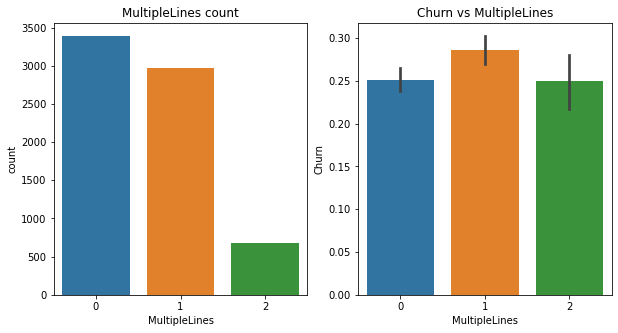

In [70]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('MultipleLines count')
ax2.set_title('Churn vs MultipleLines')
sns.countplot(df.MultipleLines, ax=ax1)
sns.barplot(df.MultipleLines, df.Churn, ax=ax2)

### InternetService

In [71]:
df.InternetService.value_counts(normalize=True).to_frame()

,InternetService
2,0.439585
1,0.343746
0,0.216669


In [72]:
df.groupby(df.InternetService).Churn.mean().to_frame()

,Churn
InternetService,
0,0.074050
1,0.189591
2,0.418928


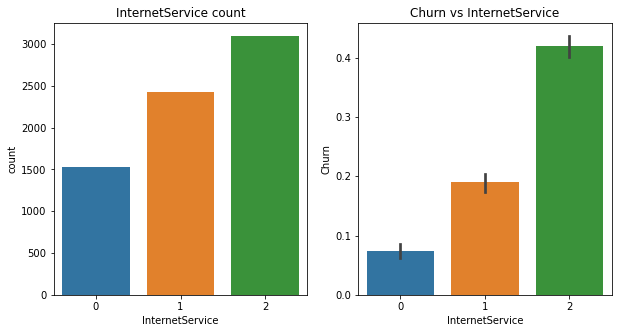

In [73]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('InternetService count')
ax2.set_title('Churn vs InternetService')
sns.countplot(df.InternetService, ax=ax1)
sns.barplot(df.InternetService, df.Churn, ax=ax2)

### OnlineSecurity

In [74]:
df.OnlineSecurity.value_counts(normalize=True).to_frame()

,OnlineSecurity
0,0.496663
1,0.286668
2,0.216669


In [75]:
df.groupby(df.OnlineSecurity).Churn.mean().to_frame()

,Churn
OnlineSecurity,
0,0.417667
1,0.146112
2,0.074050


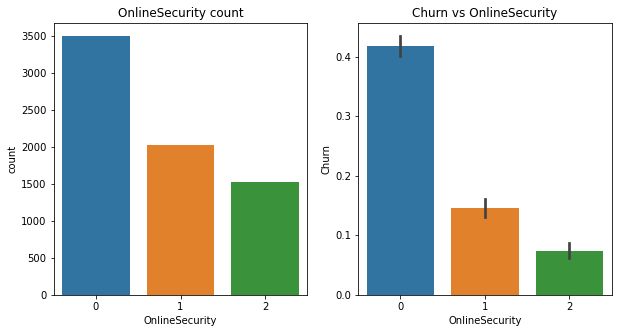

In [76]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('OnlineSecurity count')
ax2.set_title('Churn vs OnlineSecurity')
sns.countplot(df.OnlineSecurity, ax=ax1)
sns.barplot(df.OnlineSecurity, df.Churn, ax=ax2)

### OnlineBackup

In [77]:
df.OnlineBackup.value_counts(normalize=True).to_frame()

,OnlineBackup
0,0.438450
1,0.344881
2,0.216669


In [78]:
df.groupby(df.OnlineBackup).Churn.mean().to_frame()

,Churn
OnlineBackup,
0,0.399288
1,0.215315
2,0.074050


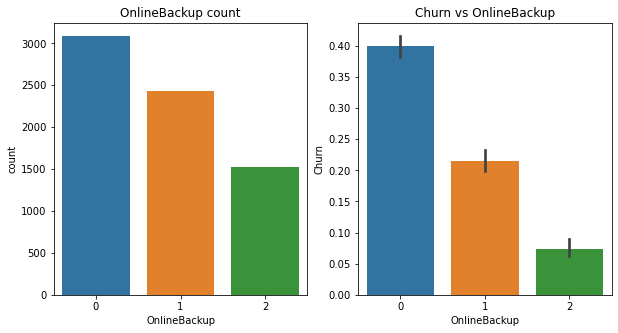

In [79]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('OnlineBackup count')
ax2.set_title('Churn vs OnlineBackup')
sns.countplot(df.OnlineBackup, ax=ax1)
sns.barplot(df.OnlineBackup, df.Churn, ax=ax2)

### DeviceProtection

In [80]:
df.DeviceProtection.value_counts(normalize=True).to_frame()

,DeviceProtection
0,0.439443
1,0.343888
2,0.216669


In [81]:
df.groupby(df.DeviceProtection).Churn.mean().to_frame()

,Churn
DeviceProtection,
0,0.391276
1,0.225021
2,0.074050


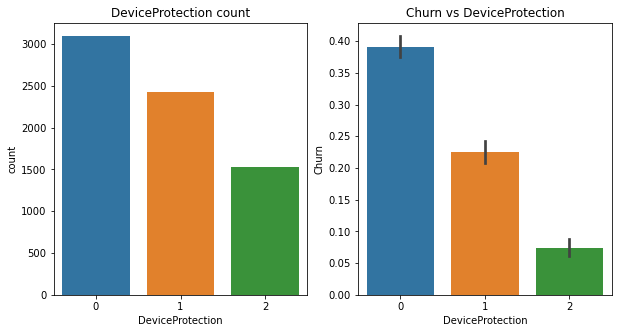

In [82]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('DeviceProtection count')
ax2.set_title('Churn vs DeviceProtection')
sns.countplot(df.DeviceProtection, ax=ax1)
sns.barplot(df.DeviceProtection, df.Churn, ax=ax2)

### TechSupport

In [83]:
df.TechSupport.value_counts(normalize=True).to_frame()

,TechSupport
0,0.493114
1,0.290217
2,0.216669


In [84]:
df.groupby(df.TechSupport).Churn.mean().to_frame()

,Churn
TechSupport,
0,0.416355
1,0.151663
2,0.074050


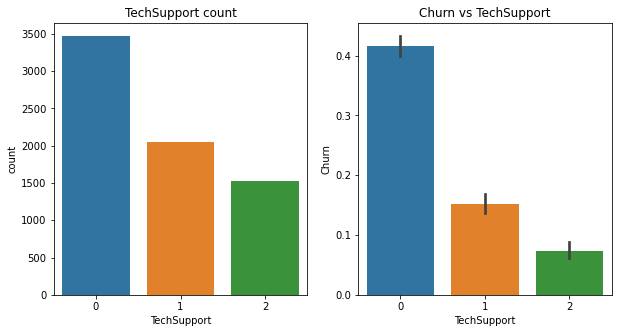

In [85]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('TechSupport count')
ax2.set_title('Churn vs TechSupport')
sns.countplot(df.TechSupport, ax=ax1)
sns.barplot(df.TechSupport, df.Churn, ax=ax2)

### StreamingTV

In [86]:
df.StreamingTV.value_counts(normalize=True).to_frame()

,StreamingTV
0,0.398978
1,0.384353
2,0.216669


In [87]:
df.groupby(df.StreamingTV).Churn.mean().to_frame()

,Churn
StreamingTV,
0,0.335231
1,0.300702
2,0.074050


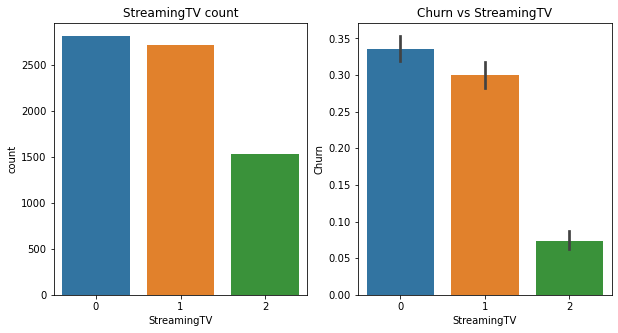

In [88]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('StreamingTV count')
ax2.set_title('Churn vs StreamingTV')
sns.countplot(df.StreamingTV, ax=ax1)
sns.barplot(df.StreamingTV, df.Churn, ax=ax2)

### StreamingMovies

In [89]:
df.StreamingMovies.value_counts(normalize=True).to_frame()

,StreamingMovies
0,0.395428
1,0.387903
2,0.216669


In [90]:
df.groupby(df.StreamingMovies).Churn.mean().to_frame()

,Churn
StreamingMovies,
0,0.336804
1,0.299414
2,0.074050


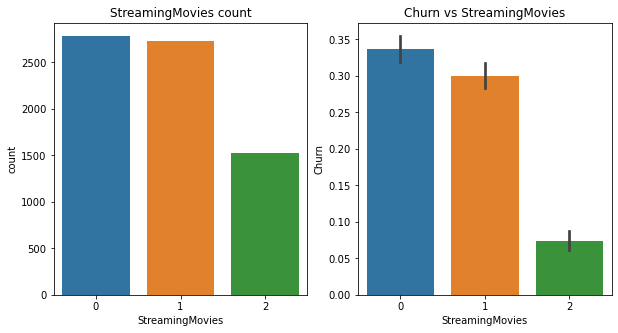

In [91]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('StreamingMovies count')
ax2.set_title('Churn vs StreamingMovies')
sns.countplot(df.StreamingMovies, ax=ax1)
sns.barplot(df.StreamingMovies, df.Churn, ax=ax2)

### Contract

In [92]:
df.Contract.value_counts(normalize=True).to_frame()

,Contract
0,0.550192
1,0.240664
2,0.209144


In [93]:
df.groupby(df.Contract).Churn.mean().to_frame()

,Churn
Contract,
0,0.427097
1,0.028319
2,0.112695


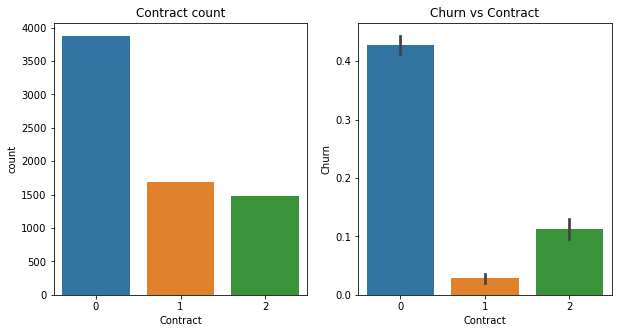

In [94]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('Contract count')
ax2.set_title('Churn vs Contract')
sns.countplot(df.Contract, ax=ax1)
sns.barplot(df.Contract, df.Churn, ax=ax2)

### PaperlessBilling

In [95]:
df.PaperlessBilling.value_counts(normalize=True).to_frame()

,PaperlessBilling
1,0.592219
0,0.407781


In [96]:
df.groupby(df.PaperlessBilling).Churn.mean().to_frame()

,Churn
PaperlessBilling,
0,0.163301
1,0.335651


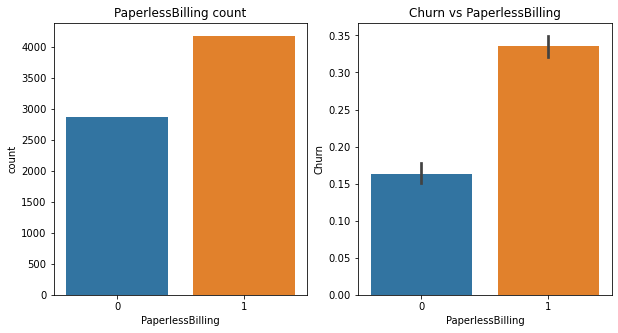

In [97]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('PaperlessBilling count')
ax2.set_title('Churn vs PaperlessBilling')
sns.countplot(df.PaperlessBilling, ax=ax1)
sns.barplot(df.PaperlessBilling, df.Churn, ax=ax2)

### PaymentMethod

In [98]:
df.PaymentMethod.value_counts(normalize=True).to_frame()

,PaymentMethod
0,0.335794
1,0.228880
2,0.219225
3,0.216101


In [99]:
df.groupby(df.PaymentMethod).Churn.mean().to_frame()

,Churn
PaymentMethod,
0,0.452854
1,0.191067
2,0.167098
3,0.152431


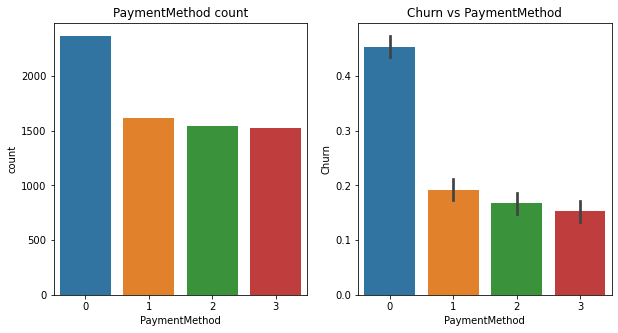

In [100]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('PaymentMethod count')
ax2.set_title('Churn vs PaymentMethod')
sns.countplot(df.PaymentMethod, ax=ax1)
sns.barplot(df.PaymentMethod, df.Churn, ax=ax2)

In [101]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.000485,-0.010380,-0.003429,-0.002032,0.005092,0.000985,0.001156,-0.000191,0.006171,-0.011754,-0.005209,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.099883,0.259390,-0.210897,-0.152780,-0.157095,-0.223770,-0.130130,-0.120802,-0.109299,0.156530,-0.093704,0.220173,0.102411,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.090981,-0.000132,0.081850,0.087055,0.094451,0.069072,0.080127,0.075779,0.216229,-0.014877,0.133115,0.096848,0.319072,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.016875,-0.179631,0.190523,0.162445,0.156439,0.180832,0.140395,0.125820,0.178429,-0.111377,0.123844,-0.113890,0.064653,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.242279,0.033230,0.145298,0.178651,0.178649,0.144459,0.136145,0.140781,0.503232,0.006152,0.340305,0.247900,0.825880,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.691070,0.093720,0.125353,0.150338,0.138755,0.123350,0.171538,0.165205,-0.000955,0.016505,-0.004070,0.247398,0.113008,0.011942
MultipleLines,-0.000485,0.099883,0.090981,-0.016875,0.242279,-0.691070,1.000000,0.174989,-0.235021,-0.210372,-0.200463,-0.232155,-0.202414,-0.195815,0.040607,0.108230,0.030659,0.146153,0.251357,0.019423
InternetService,-0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.174989,1.000000,-0.764943,-0.686403,-0.682448,-0.760985,-0.617704,-0.620005,-0.203148,0.378108,-0.178137,0.905491,0.428212,0.316846
OnlineSecurity,-0.003429,-0.210897,0.081850,0.190523,0.145298,0.125353,-0.235021,-0.764943,1.000000,0.751661,0.749040,0.791225,0.701976,0.704984,0.275864,-0.334003,0.213800,-0.621227,-0.153234,-0.332819
OnlineBackup,-0.002032,-0.152780,0.087055,0.162445,0.178651,0.150338,-0.210372,-0.686403,0.751661,1.000000,0.740604,0.754095,0.720671,0.716700,0.252097,-0.262402,0.182909,-0.538454,-0.085017,-0.291449


In [102]:
df['Tenure'] = df.tenure.map(lambda x : 1 if x>20 else 0)

In [103]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,2,0,1,56.95,1889.50,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1,0
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,0,1,1,0,0,2,0,2,42.30,1840.75,0,1
4,9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1,0


In [104]:
features = ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Tenure', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

## Classification models

In [105]:
df.sample(frac=1).reset_index(drop=True)
df_train = df[features].head(4000)
df_test = df[features].tail(3043)

In [106]:
dep_features = ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Tenure', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [107]:
X = df[dep_features]
y = df['Churn']
X_train = df_train[dep_features]
y_train = df_train['Churn']
X_test = df_test[dep_features]
y_test = df_test['Churn']

### Logistic regression

In [108]:
clf = LogisticRegression()

In [109]:
kf = KFold(n_splits=5)
accuracy = []
for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
    clf.fit(X_train_fold, y_train_fold)
    accuracy.append(clf.score(X_test_fold, y_test_fold))
    
print('Accuracy on all folds: ', accuracy)
print('Mean accuracy: ', np.mean(accuracy))

Accuracy on all folds:  [0.7984386089425124, 0.8090844570617459, 0.7877927608232789, 0.7940340909090909, 0.796875]
Mean accuracy:  0.7972449835473256


In [110]:
print('Test set score: ', clf.score(X_test, y_test))

Test set score:  0.7992113046335853


### Support Vector Machine

In [111]:
svm_clf = svm.SVC()

In [112]:
kf = KFold(n_splits=5)
accuracy = []
for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
    svm_clf.fit(X_train_fold, y_train_fold)
    accuracy.append(svm_clf.score(X_test_fold, y_test_fold))
    
print('Accuracy on all folds: ', accuracy)
print('Mean accuracy: ', np.mean(accuracy))

Accuracy on all folds:  [0.7991483321504613, 0.8041163946061036, 0.7778566359119943, 0.7848011363636364, 0.7904829545454546]
Mean accuracy:  0.7912810907155301


In [113]:
print('Test set score: ', svm_clf.score(X_test, y_test))

Test set score:  0.7903384817614196


## Non linear models

In [114]:
df = pd.get_dummies(df, columns=encode_cols, drop_first=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Tenure,MultipleLines_1,MultipleLines_2,InternetService_1,InternetService_2,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_1,OnlineBackup_2,DeviceProtection_1,DeviceProtection_2,TechSupport_1,TechSupport_2,StreamingTV_1,StreamingTV_2,StreamingMovies_1,StreamingMovies_2,Contract_1,Contract_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [115]:
features = ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService_2', 'InternetService_1', 'InternetService_2', 'OnlineSecurity_1', 'OnlineSecurity_2', 'OnlineBackup_1', 'OnlineBackup_2', 'DeviceProtection_1', 'DeviceProtection_2', 'TechSupport_1', 'StreamingTV_2', 'StreamingTV_1', 'StreamingTV_2', 'Tenure', 'StreamingMovies_1', 'StreamingMovies_2', 'Contract_1', 'Contract_2', 'PaperlessBilling', 'PaymentMethod_1', 'PaymentMethod_2', 'PaymentMethod_3', 'Churn']

In [116]:
dep_features = ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService_2', 'InternetService_1', 'InternetService_2', 'OnlineSecurity_1', 'OnlineSecurity_2', 'OnlineBackup_1', 'OnlineBackup_2', 'DeviceProtection_1', 'DeviceProtection_2', 'TechSupport_1', 'StreamingTV_2', 'StreamingTV_1', 'StreamingTV_2', 'Tenure', 'StreamingMovies_1', 'StreamingMovies_2', 'Contract_1', 'Contract_2', 'PaperlessBilling', 'PaymentMethod_1', 'PaymentMethod_2', 'PaymentMethod_3']

In [117]:
df.sample(frac=1).reset_index(drop=True)
df_train = df[features].head(4000)
df_test = df[features].tail(3043)

In [118]:
X = df[dep_features]
y = df['Churn']
X_train = df_train[dep_features]
y_train = df_train['Churn']
X_test = df_test[dep_features]
y_test = df_test['Churn']

### Decision tree classifier

In [119]:
dt = DecisionTreeClassifier()

In [120]:
kf = KFold(n_splits=5)
accuracy = []
for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
    dt.fit(X_train_fold, y_train_fold)
    accuracy.append(dt.score(X_test_fold, y_test_fold))
    
print('Accuracy on all folds: ', accuracy)
print('Mean accuracy: ', np.mean(accuracy))

Accuracy on all folds:  [0.7295954577714692, 0.7452093683463449, 0.7473385379701917, 0.7294034090909091, 0.7258522727272727]
Mean accuracy:  0.7354798091812376


In [121]:
#print('Test set score: ', dt.score(X_test, y_test))

### Random Forest Classifier

In [122]:
rf_clf = RandomForestClassifier(n_jobs=-1)

In [123]:
kf = KFold(n_splits=5)
accuracy = []
for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
    rf_clf.fit(X_train_fold, y_train_fold)
    accuracy.append(rf_clf.score(X_test_fold, y_test_fold))
    
print('Accuracy on all folds: ', accuracy)
print('Mean accuracy: ', np.mean(accuracy))

Accuracy on all folds:  [0.7565649396735273, 0.7750177430801988, 0.7629524485450674, 0.7606534090909091, 0.7734375]
Mean accuracy:  0.7657252080779406


In [124]:
#print('Test set score: ', rf_clf.score(X_test, y_test))

In [125]:
 param_grid = {
 "n_estimators": [100, 200, 250, 300, 400, 500],
 "max_depth": [1, 2, 5, 7, 11, 15],
 "criterion": ["gini", "entropy"]
 }

In [126]:
 model = GridSearchCV(
 estimator=rf_clf,
 param_grid=param_grid,
 scoring="accuracy",
 verbose=10,
 n_jobs=1,
 cv=5
 )

In [127]:
model.fit(X, y)
print(f"Best score: {model.best_score_}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 1/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100; total time=   4.7s
[CV 2/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 2/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100; total time=   0.3s
[CV 3/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 3/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100; total time=   0.5s
[CV 4/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 4/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100; total time=   0.5s
[CV 5/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 5/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100; total time=   0.4s
[CV 1/5; 2/72] START criterion=gini, max_depth=1, n_estimators=200..............
[CV 1/5; 2/72] END criterio

[CV 5/5; 10/72] END criterion=gini, max_depth=2, n_estimators=300; total time=   1.4s
[CV 1/5; 11/72] START criterion=gini, max_depth=2, n_estimators=400.............
[CV 1/5; 11/72] END criterion=gini, max_depth=2, n_estimators=400; total time=   1.2s
[CV 2/5; 11/72] START criterion=gini, max_depth=2, n_estimators=400.............
[CV 2/5; 11/72] END criterion=gini, max_depth=2, n_estimators=400; total time=   1.3s
[CV 3/5; 11/72] START criterion=gini, max_depth=2, n_estimators=400.............
[CV 3/5; 11/72] END criterion=gini, max_depth=2, n_estimators=400; total time=   1.2s
[CV 4/5; 11/72] START criterion=gini, max_depth=2, n_estimators=400.............
[CV 4/5; 11/72] END criterion=gini, max_depth=2, n_estimators=400; total time=   1.4s
[CV 5/5; 11/72] START criterion=gini, max_depth=2, n_estimators=400.............
[CV 5/5; 11/72] END criterion=gini, max_depth=2, n_estimators=400; total time=   1.4s
[CV 1/5; 12/72] START criterion=gini, max_depth=2, n_estimators=500............

[CV 5/5; 20/72] END criterion=gini, max_depth=7, n_estimators=200; total time=   0.6s
[CV 1/5; 21/72] START criterion=gini, max_depth=7, n_estimators=250.............
[CV 1/5; 21/72] END criterion=gini, max_depth=7, n_estimators=250; total time=   0.8s
[CV 2/5; 21/72] START criterion=gini, max_depth=7, n_estimators=250.............
[CV 2/5; 21/72] END criterion=gini, max_depth=7, n_estimators=250; total time=   1.2s
[CV 3/5; 21/72] START criterion=gini, max_depth=7, n_estimators=250.............
[CV 3/5; 21/72] END criterion=gini, max_depth=7, n_estimators=250; total time=   0.8s
[CV 4/5; 21/72] START criterion=gini, max_depth=7, n_estimators=250.............
[CV 4/5; 21/72] END criterion=gini, max_depth=7, n_estimators=250; total time=   0.8s
[CV 5/5; 21/72] START criterion=gini, max_depth=7, n_estimators=250.............
[CV 5/5; 21/72] END criterion=gini, max_depth=7, n_estimators=250; total time=   0.8s
[CV 1/5; 22/72] START criterion=gini, max_depth=7, n_estimators=300............

[CV 4/5; 30/72] END criterion=gini, max_depth=11, n_estimators=500; total time=   1.8s
[CV 5/5; 30/72] START criterion=gini, max_depth=11, n_estimators=500............
[CV 5/5; 30/72] END criterion=gini, max_depth=11, n_estimators=500; total time=   1.8s
[CV 1/5; 31/72] START criterion=gini, max_depth=15, n_estimators=100............
[CV 1/5; 31/72] END criterion=gini, max_depth=15, n_estimators=100; total time=   0.4s
[CV 2/5; 31/72] START criterion=gini, max_depth=15, n_estimators=100............
[CV 2/5; 31/72] END criterion=gini, max_depth=15, n_estimators=100; total time=   0.5s
[CV 3/5; 31/72] START criterion=gini, max_depth=15, n_estimators=100............
[CV 3/5; 31/72] END criterion=gini, max_depth=15, n_estimators=100; total time=   0.4s
[CV 4/5; 31/72] START criterion=gini, max_depth=15, n_estimators=100............
[CV 4/5; 31/72] END criterion=gini, max_depth=15, n_estimators=100; total time=   0.4s
[CV 5/5; 31/72] START criterion=gini, max_depth=15, n_estimators=100.....

[CV 3/5; 40/72] END criterion=entropy, max_depth=1, n_estimators=300; total time=   1.0s
[CV 4/5; 40/72] START criterion=entropy, max_depth=1, n_estimators=300..........
[CV 4/5; 40/72] END criterion=entropy, max_depth=1, n_estimators=300; total time=   0.8s
[CV 5/5; 40/72] START criterion=entropy, max_depth=1, n_estimators=300..........
[CV 5/5; 40/72] END criterion=entropy, max_depth=1, n_estimators=300; total time=   1.2s
[CV 1/5; 41/72] START criterion=entropy, max_depth=1, n_estimators=400..........
[CV 1/5; 41/72] END criterion=entropy, max_depth=1, n_estimators=400; total time=   1.0s
[CV 2/5; 41/72] START criterion=entropy, max_depth=1, n_estimators=400..........
[CV 2/5; 41/72] END criterion=entropy, max_depth=1, n_estimators=400; total time=   1.2s
[CV 3/5; 41/72] START criterion=entropy, max_depth=1, n_estimators=400..........
[CV 3/5; 41/72] END criterion=entropy, max_depth=1, n_estimators=400; total time=   1.1s
[CV 4/5; 41/72] START criterion=entropy, max_depth=1, n_estim

[CV 2/5; 50/72] END criterion=entropy, max_depth=5, n_estimators=200; total time=   0.6s
[CV 3/5; 50/72] START criterion=entropy, max_depth=5, n_estimators=200..........
[CV 3/5; 50/72] END criterion=entropy, max_depth=5, n_estimators=200; total time=   0.6s
[CV 4/5; 50/72] START criterion=entropy, max_depth=5, n_estimators=200..........
[CV 4/5; 50/72] END criterion=entropy, max_depth=5, n_estimators=200; total time=   0.7s
[CV 5/5; 50/72] START criterion=entropy, max_depth=5, n_estimators=200..........
[CV 5/5; 50/72] END criterion=entropy, max_depth=5, n_estimators=200; total time=   0.9s
[CV 1/5; 51/72] START criterion=entropy, max_depth=5, n_estimators=250..........
[CV 1/5; 51/72] END criterion=entropy, max_depth=5, n_estimators=250; total time=   0.8s
[CV 2/5; 51/72] START criterion=entropy, max_depth=5, n_estimators=250..........
[CV 2/5; 51/72] END criterion=entropy, max_depth=5, n_estimators=250; total time=   0.7s
[CV 3/5; 51/72] START criterion=entropy, max_depth=5, n_estim

[CV 1/5; 60/72] END criterion=entropy, max_depth=7, n_estimators=500; total time=   1.5s
[CV 2/5; 60/72] START criterion=entropy, max_depth=7, n_estimators=500..........
[CV 2/5; 60/72] END criterion=entropy, max_depth=7, n_estimators=500; total time=   1.6s
[CV 3/5; 60/72] START criterion=entropy, max_depth=7, n_estimators=500..........
[CV 3/5; 60/72] END criterion=entropy, max_depth=7, n_estimators=500; total time=   1.5s
[CV 4/5; 60/72] START criterion=entropy, max_depth=7, n_estimators=500..........
[CV 4/5; 60/72] END criterion=entropy, max_depth=7, n_estimators=500; total time=   1.8s
[CV 5/5; 60/72] START criterion=entropy, max_depth=7, n_estimators=500..........
[CV 5/5; 60/72] END criterion=entropy, max_depth=7, n_estimators=500; total time=   1.8s
[CV 1/5; 61/72] START criterion=entropy, max_depth=11, n_estimators=100.........
[CV 1/5; 61/72] END criterion=entropy, max_depth=11, n_estimators=100; total time=   0.4s
[CV 2/5; 61/72] START criterion=entropy, max_depth=11, n_est

[CV 4/5; 69/72] END criterion=entropy, max_depth=15, n_estimators=250; total time=   1.1s
[CV 5/5; 69/72] START criterion=entropy, max_depth=15, n_estimators=250.........
[CV 5/5; 69/72] END criterion=entropy, max_depth=15, n_estimators=250; total time=   1.2s
[CV 1/5; 70/72] START criterion=entropy, max_depth=15, n_estimators=300.........
[CV 1/5; 70/72] END criterion=entropy, max_depth=15, n_estimators=300; total time=   1.3s
[CV 2/5; 70/72] START criterion=entropy, max_depth=15, n_estimators=300.........
[CV 2/5; 70/72] END criterion=entropy, max_depth=15, n_estimators=300; total time=   1.5s
[CV 3/5; 70/72] START criterion=entropy, max_depth=15, n_estimators=300.........
[CV 3/5; 70/72] END criterion=entropy, max_depth=15, n_estimators=300; total time=   1.3s
[CV 4/5; 70/72] START criterion=entropy, max_depth=15, n_estimators=300.........
[CV 4/5; 70/72] END criterion=entropy, max_depth=15, n_estimators=300; total time=   1.6s
[CV 5/5; 70/72] START criterion=entropy, max_depth=15, 

In [128]:
print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()

for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Best parameters set:
	criterion: entropy
	max_depth: 7
	n_estimators: 200


### Boosting classifier

In [129]:
gb_clf = GradientBoostingClassifier()

In [130]:
 param_grid = {
     'learning_rate': [0.05, 0.1],
     "n_estimators": [100, 300, 500],
     "max_depth": [3, 5, 7, 9],
     "criterion": ["friedman_mse", "mse"]
 }

In [131]:
 model = GridSearchCV(
 estimator=gb_clf,
 param_grid=param_grid,
 scoring="accuracy",
 verbose=10,
 n_jobs=1,
 cv=5
 )

In [132]:
model.fit(X, y)
print(f"Best score: {model.best_score_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START criterion=friedman_mse, learning_rate=0.05, max_depth=3, n_estimators=100
[CV 1/5; 1/48] END criterion=friedman_mse, learning_rate=0.05, max_depth=3, n_estimators=100; total time=   1.2s
[CV 2/5; 1/48] START criterion=friedman_mse, learning_rate=0.05, max_depth=3, n_estimators=100
[CV 2/5; 1/48] END criterion=friedman_mse, learning_rate=0.05, max_depth=3, n_estimators=100; total time=   1.0s
[CV 3/5; 1/48] START criterion=friedman_mse, learning_rate=0.05, max_depth=3, n_estimators=100
[CV 3/5; 1/48] END criterion=friedman_mse, learning_rate=0.05, max_depth=3, n_estimators=100; total time=   1.2s
[CV 4/5; 1/48] START criterion=friedman_mse, learning_rate=0.05, max_depth=3, n_estimators=100
[CV 4/5; 1/48] END criterion=friedman_mse, learning_rate=0.05, max_depth=3, n_estimators=100; total time=   1.4s
[CV 5/5; 1/48] START criterion=friedman_mse, learning_rate=0.05, max_depth=3, n_estimators=100
[CV 5/5; 1/

[CV 5/5; 8/48] END criterion=friedman_mse, learning_rate=0.05, max_depth=7, n_estimators=300; total time=  12.7s
[CV 1/5; 9/48] START criterion=friedman_mse, learning_rate=0.05, max_depth=7, n_estimators=500
[CV 1/5; 9/48] END criterion=friedman_mse, learning_rate=0.05, max_depth=7, n_estimators=500; total time=  20.0s
[CV 2/5; 9/48] START criterion=friedman_mse, learning_rate=0.05, max_depth=7, n_estimators=500
[CV 2/5; 9/48] END criterion=friedman_mse, learning_rate=0.05, max_depth=7, n_estimators=500; total time=  19.2s
[CV 3/5; 9/48] START criterion=friedman_mse, learning_rate=0.05, max_depth=7, n_estimators=500
[CV 3/5; 9/48] END criterion=friedman_mse, learning_rate=0.05, max_depth=7, n_estimators=500; total time=  16.2s
[CV 4/5; 9/48] START criterion=friedman_mse, learning_rate=0.05, max_depth=7, n_estimators=500
[CV 4/5; 9/48] END criterion=friedman_mse, learning_rate=0.05, max_depth=7, n_estimators=500; total time=  14.9s
[CV 5/5; 9/48] START criterion=friedman_mse, learning_r

[CV 5/5; 16/48] END criterion=friedman_mse, learning_rate=0.1, max_depth=5, n_estimators=100; total time=   1.8s
[CV 1/5; 17/48] START criterion=friedman_mse, learning_rate=0.1, max_depth=5, n_estimators=300
[CV 1/5; 17/48] END criterion=friedman_mse, learning_rate=0.1, max_depth=5, n_estimators=300; total time=   5.4s
[CV 2/5; 17/48] START criterion=friedman_mse, learning_rate=0.1, max_depth=5, n_estimators=300
[CV 2/5; 17/48] END criterion=friedman_mse, learning_rate=0.1, max_depth=5, n_estimators=300; total time=   5.4s
[CV 3/5; 17/48] START criterion=friedman_mse, learning_rate=0.1, max_depth=5, n_estimators=300
[CV 3/5; 17/48] END criterion=friedman_mse, learning_rate=0.1, max_depth=5, n_estimators=300; total time=   5.5s
[CV 4/5; 17/48] START criterion=friedman_mse, learning_rate=0.1, max_depth=5, n_estimators=300
[CV 4/5; 17/48] END criterion=friedman_mse, learning_rate=0.1, max_depth=5, n_estimators=300; total time=   5.5s
[CV 5/5; 17/48] START criterion=friedman_mse, learning_

[CV 5/5; 24/48] END criterion=friedman_mse, learning_rate=0.1, max_depth=9, n_estimators=500; total time=  39.6s
[CV 1/5; 25/48] START criterion=mse, learning_rate=0.05, max_depth=3, n_estimators=100
[CV 1/5; 25/48] END criterion=mse, learning_rate=0.05, max_depth=3, n_estimators=100; total time=   1.0s
[CV 2/5; 25/48] START criterion=mse, learning_rate=0.05, max_depth=3, n_estimators=100
[CV 2/5; 25/48] END criterion=mse, learning_rate=0.05, max_depth=3, n_estimators=100; total time=   1.2s
[CV 3/5; 25/48] START criterion=mse, learning_rate=0.05, max_depth=3, n_estimators=100
[CV 3/5; 25/48] END criterion=mse, learning_rate=0.05, max_depth=3, n_estimators=100; total time=   1.1s
[CV 4/5; 25/48] START criterion=mse, learning_rate=0.05, max_depth=3, n_estimators=100
[CV 4/5; 25/48] END criterion=mse, learning_rate=0.05, max_depth=3, n_estimators=100; total time=   1.1s
[CV 5/5; 25/48] START criterion=mse, learning_rate=0.05, max_depth=3, n_estimators=100
[CV 5/5; 25/48] END criterion=ms

[CV 3/5; 33/48] END criterion=mse, learning_rate=0.05, max_depth=7, n_estimators=500; total time=  15.2s
[CV 4/5; 33/48] START criterion=mse, learning_rate=0.05, max_depth=7, n_estimators=500
[CV 4/5; 33/48] END criterion=mse, learning_rate=0.05, max_depth=7, n_estimators=500; total time=  15.3s
[CV 5/5; 33/48] START criterion=mse, learning_rate=0.05, max_depth=7, n_estimators=500
[CV 5/5; 33/48] END criterion=mse, learning_rate=0.05, max_depth=7, n_estimators=500; total time=  15.1s
[CV 1/5; 34/48] START criterion=mse, learning_rate=0.05, max_depth=9, n_estimators=100
[CV 1/5; 34/48] END criterion=mse, learning_rate=0.05, max_depth=9, n_estimators=100; total time=   5.4s
[CV 2/5; 34/48] START criterion=mse, learning_rate=0.05, max_depth=9, n_estimators=100
[CV 2/5; 34/48] END criterion=mse, learning_rate=0.05, max_depth=9, n_estimators=100; total time=   5.5s
[CV 3/5; 34/48] START criterion=mse, learning_rate=0.05, max_depth=9, n_estimators=100
[CV 3/5; 34/48] END criterion=mse, learn

[CV 1/5; 42/48] END criterion=mse, learning_rate=0.1, max_depth=5, n_estimators=500; total time=   3.2s
[CV 2/5; 42/48] START criterion=mse, learning_rate=0.1, max_depth=5, n_estimators=500
[CV 2/5; 42/48] END criterion=mse, learning_rate=0.1, max_depth=5, n_estimators=500; total time=   3.2s
[CV 3/5; 42/48] START criterion=mse, learning_rate=0.1, max_depth=5, n_estimators=500
[CV 3/5; 42/48] END criterion=mse, learning_rate=0.1, max_depth=5, n_estimators=500; total time=   3.1s
[CV 4/5; 42/48] START criterion=mse, learning_rate=0.1, max_depth=5, n_estimators=500
[CV 4/5; 42/48] END criterion=mse, learning_rate=0.1, max_depth=5, n_estimators=500; total time=   3.1s
[CV 5/5; 42/48] START criterion=mse, learning_rate=0.1, max_depth=5, n_estimators=500
[CV 5/5; 42/48] END criterion=mse, learning_rate=0.1, max_depth=5, n_estimators=500; total time=   3.1s
[CV 1/5; 43/48] START criterion=mse, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 1/5; 43/48] END criterion=mse, learning_rate=0

In [133]:
print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()

for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Best parameters set:
	criterion: friedman_mse
	learning_rate: 0.1
	max_depth: 3
	n_estimators: 100


In [134]:
gb_clf = GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate=0.05, max_depth=3, n_estimators=100)

In [135]:
kf = KFold(n_splits=5)
accuracy = []
for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
    gb_clf.fit(X_train_fold, y_train_fold)
    accuracy.append(gb_clf.score(X_test_fold, y_test_fold))
    
print('Accuracy on all folds: ', accuracy)
print('Mean accuracy: ', np.mean(accuracy))

Accuracy on all folds:  [0.7970191625266146, 0.8041163946061036, 0.7814052519517388, 0.7933238636363636, 0.7947443181818182]
Mean accuracy:  0.7941217981805279


In [136]:
#print('Test set score: ', gb_clf.score(X_test, y_test))

## Conclusion

1. Data cleaning including missing values, outliers and multi-collinearity. Describe your predictive churn model. How did you select variables to be included in the model?

As per the data analysis, there are no missing values in the dataset provided. As a matter of fact, there are no outliers as well.
After plotting the correlation matrix, we find that the features MonthlyCharges and InternetService are highly correlated. Also TotalCharges and tenure are significantly correlated. Hence we drop the MonthlyCharges and TotalCharges features to overcome multi-colinearity.

2. Demonstrate the performance of the model.

Here we have tried linear models like Logistic regression and Support Vector Classifier. Also we have fitted non-linear models like Decision tree classifier, Random forest classifier and Gradient boosting Classifiers. The performance of the model is measured based on accuracy (i.e., (tp + tn)/(tp + fp + tn + fn)). We get the best accuracy of ~ 80%

3. What are the key factors that predict customer churn? Do these factors make sense?

Key factors that predict custoner churn are SeniorCitizen, Partner, Dependents, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, Tenure, StreamingMovies, Contract, PaperlessBilling, PaymentMethod. These features are significant in predicting the customer churn.

4. What offers should be made to which customers to encourage them to remain with company?

In the exploratory data analysis, we observe that the customer churn rate is significantly high for young, independent population with internet service.
Hence, we can try to entice and retain this customer segments with offers such as random rewards, gift vouchers and student discounts. Also we can offer loyalty points proportional to the time period they remain with the company.

5. Assuming these actions were implemented, how would you determine whether they had worked?

We can perform the churn analysis to understand if the churn rate have reduced or not. If they have, it gives us a hint that our actions have helped reduce the churn. However, this conclusion cannot be made with full confidence.
To understand what factors have helped reduce the churn, we will have to perform some advanced statistical tests including 1 way anova, 2 way anove, chi-square tests, etc. to arrive at a conclusion which can be verified using hypothesis tests.